In [3]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [4]:
data=pd.read_csv("D:\\Data Science-ExcelR\\Data Sceince-Tahera\\bank-full.csv",sep=';')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#SELECT COLUMNS

In [8]:
columns=['age','balance','duration','campaign','y']
data_sel=data[columns]
data_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:>

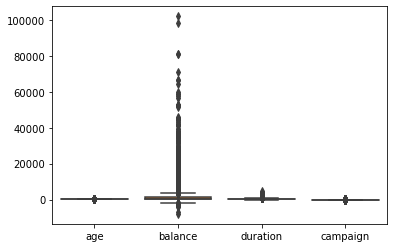

In [14]:
sb.boxplot(data=data_sel,orient="v")

In [ ]:
#LOGISTIC TRANSFORMATION

In [21]:
feature_col=['age','balance','duration','campaign'] 

In [22]:
output_target=['outcome']

In [23]:
x=data_sel[feature_col]
y=data_sel[output_target]

In [24]:
classifeir=LogisticRegression()

In [25]:
classifeir.fit(x,y)

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [26]:
classifeir.coef_

array([[ 7.69721816e-03,  3.72191058e-05,  3.54908906e-03,
        -1.39828317e-01]])

In [28]:
classifeir.predict_proba(x)

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553761, 0.69446239],
       [0.82336233, 0.17663767],
       [0.86407826, 0.13592174]])

In [29]:
y_pred=classifeir.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


NameError: name 'plt' is not defined

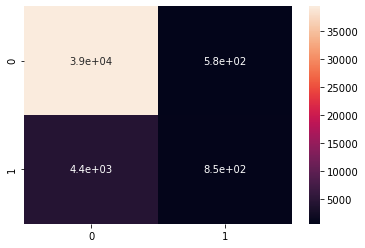

In [37]:
sb.heatmap(confusion_matrix,annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#OUTPUT TARGET

In [ ]:
#Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [18]:
data.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

In [16]:
data_sel['outcome']=data_sel.y.map({'no':0,'yes':1})

<ipython-input-16-fbaa285af92e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sel['outcome']=data_sel.y.map({'no':0,'yes':1})


In [17]:
data_sel.tail(10)

,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

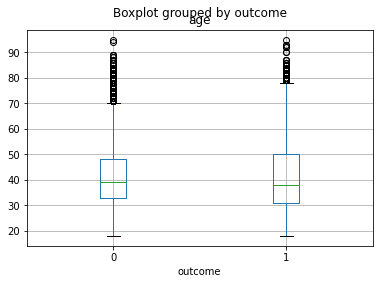

In [19]:
data_sel.boxplot(column='age',by='outcome')